In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Generate profiling report**


Dataset Shape: (1240, 17)

Data Types:
 category                object
Clothing                object
price                    int64
original_price           int64
rating                 float64
rating_count             int64
scraped_date            object
size                    object
color                   object
material                object
discount_percentage    float64
availability            object
is_bestseller             bool
return_policy           object
delivery_time           object
trending                  bool
customer_reviews         int64
dtype: object

Missing Values:
 category               0
Clothing               0
price                  0
original_price         0
rating                 0
rating_count           0
scraped_date           0
size                   1
color                  0
material               0
discount_percentage    0
availability           0
is_bestseller          0
return_policy          0
delivery_time          0
trending               0


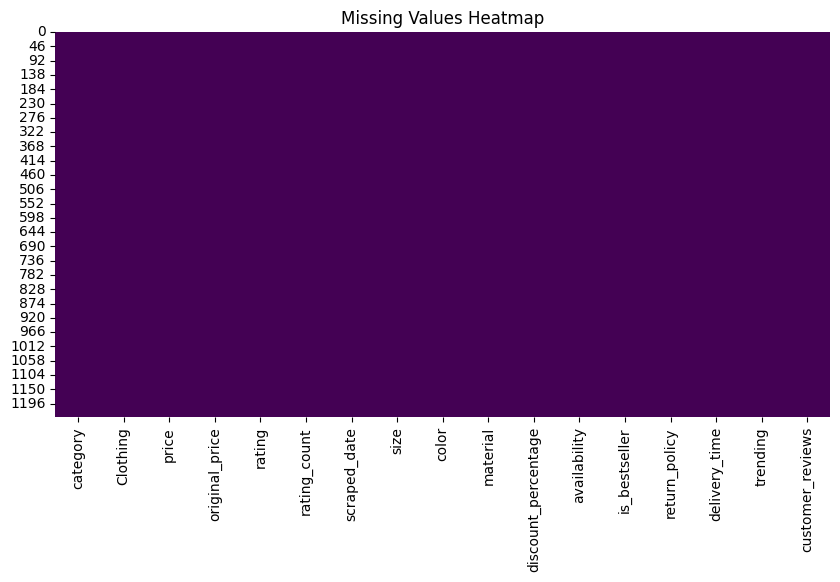

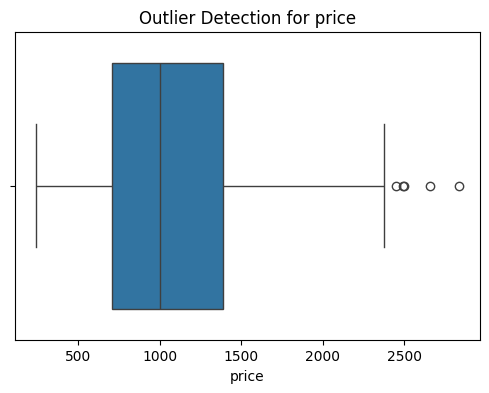

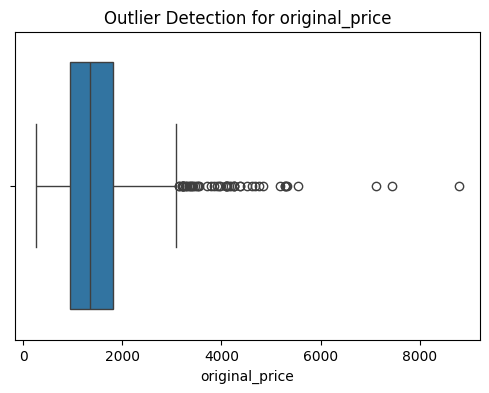

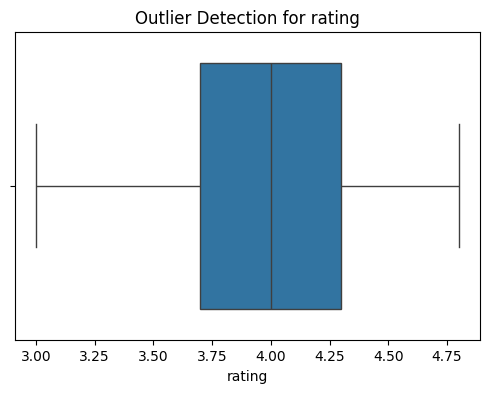

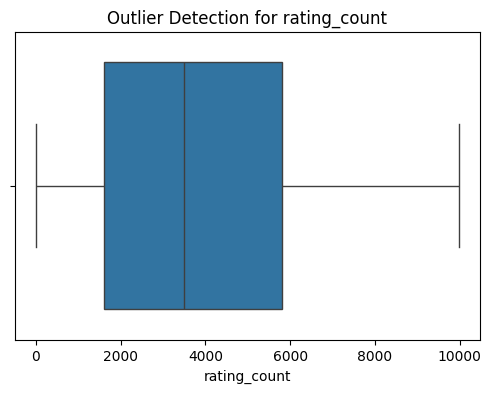

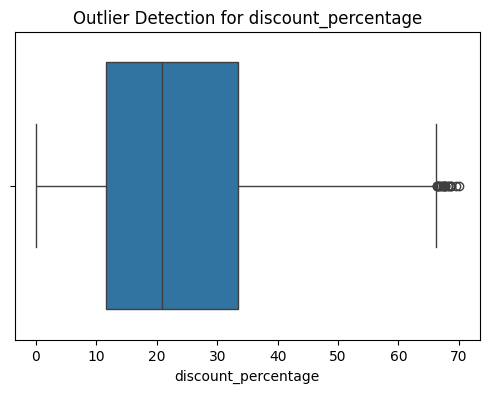

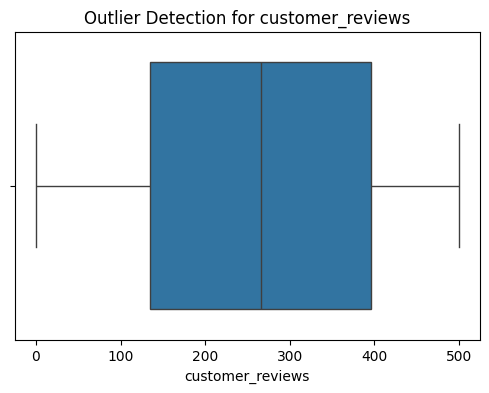

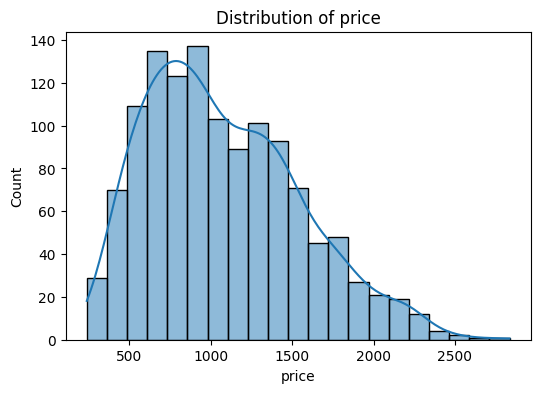

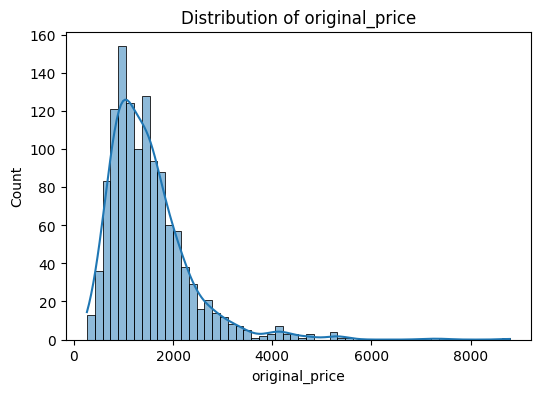

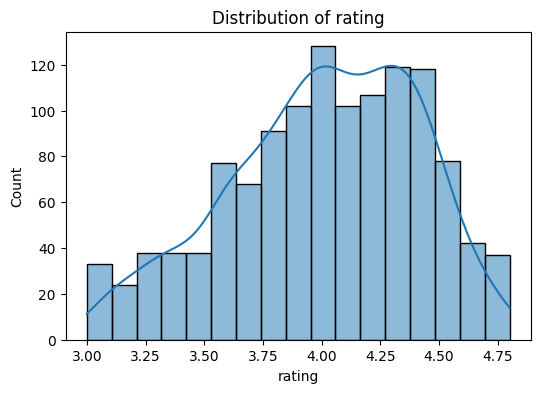

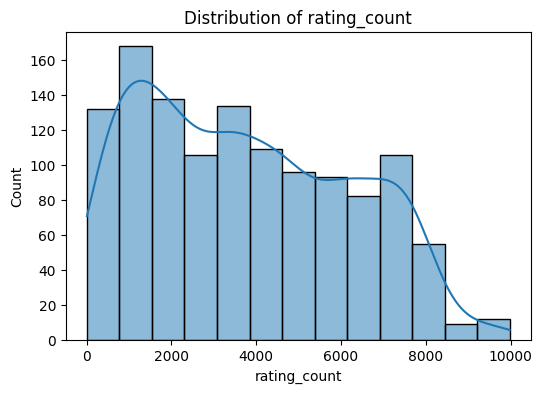

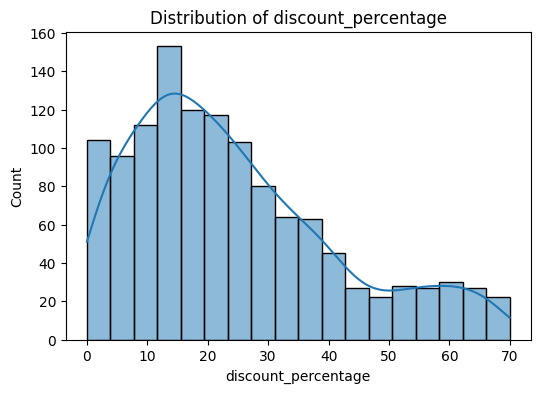

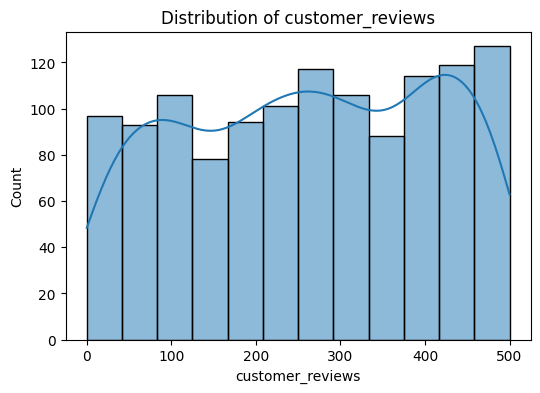

In [ ]:
df = pd.read_csv("..\..\datasets\DS-2-8-25\comprehensive_clothing_dataset_expanded_20250802_210102.csv")

print("\nDataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

print("\nNumeric Columns Summary:\n", df.describe())

print("\nCategorical Columns Summary:\n", df.describe(include='object'))

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
!pip install pyjanitor

  Using cached pyjanitor-0.31.0-py3-none-any.whl.metadata (6.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.2 MB/s eta 0:00:00


**Data Cleaning**

In [ ]:
import janitor

# Fill missing size with mode
df['size'].fillna(df['size'].mode()[0], inplace=True)

# Remove duplicates
df = df.drop_duplicates()

# Clean categorical columns
categorical_cols = ['category', 'Clothing', 'color', 'material', 'availability', 'return_policy', 'delivery_time']
for col in categorical_cols:
    df[col] = df[col].str.strip().str.title()

print("Cleaned dataset shape:", df.shape)


Cleaned dataset shape: (1240, 17)


**Feature Engineering**

In [ ]:
# Calculate discount value
df['discount_value'] = df['original_price'] - df['price']

# Discount flag
df['discount_flag'] = (df['discount_value'] > 0).astype(int)

# Convert scraped_date to datetime and extract weekday
df['scraped_date'] = pd.to_datetime(df['scraped_date'])
df['scraped_weekday'] = df['scraped_date'].dt.day_name()

# Example: time_of_day_flag (mock logic: based on price just for example)
df['time_of_day_flag'] = pd.cut(df['price'],
                                bins=[0, 500, 1000, 2000],
                                labels=['Morning', 'Afternoon', 'Evening'])


In [ ]:
df = pd.read_csv("/content/raw_dataset.csv")


In [ ]:
!pip install pandera --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pyspark/sql/pandas/utils.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pandas.__version__) < LooseVersion(minimum_pandas_version):
/usr/local/lib/python3.11/dist-packages/pyspark/sql/pandas/utils.py:64: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pyarrow.__version__) < LooseVersion(minimum_pyarrow_version):
/usr/local/lib/python3.11/dist-packages/pyspark/pandas/__init__.py:47: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(pyarrow.__version__) >= LooseVersion("2.0.0")


✅ Schema validation passed!


/usr/local/lib/python3.11/dist-packages/pyspark/pandas/groupby.py:49: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(pd.__version__) >= LooseVersion("1.3.0"):
/usr/local/lib/python3.11/dist-packages/pandera/_pandas_deprecated.py:146: FutureWarning: Importing pandas-specific classes and functions from the
top-level pandera module will be **removed in a future version of pandera**.
If you're using pandera to validate pandas objects, we highly recommend updating
your import:

```
# old import
import pandera as pa

# new import
import pandera.pandas as pa
```

If you're using pandera to validate objects from other compatible libraries
like pyspark or polars, see the supported libraries section of the documentation
for more information on how to import pandera:

https://pandera.readthedocs.io/en/stable/supported_libraries.html

To disable this warning, set the environment variable:

```
export DISABLE_PANDERA_IMPORT_WARNING=Tru

**Schema Validation**

In [ ]:

import pandera as pa
from pandera import Column, DataFrameSchema, Check
import pandas as pd

# Define schema
schema = DataFrameSchema({
    "price": Column(int, Check.greater_than_or_equal_to(0), nullable=False),
    "category": Column(str, nullable=False),
    "rating": Column(float, Check.in_range(0, 5), nullable=False),
    "discount_percentage": Column(float, Check.in_range(0, 100), nullable=False),
})

# Validate DataFrame
schema.validate(df)
print("✅ Schema validation passed!")


✅ Schema validation passed!


In [ ]:
df

,category,Clothing,price,original_price,rating,rating_count,scraped_date,size,color,material,...,availability,is_bestseller,return_policy,delivery_time,trending,customer_reviews,discount_value,discount_flag,scraped_weekday,time_of_day_flag
0,Men Tshirts,T-Shirt,628,857,4.8,3497,2025-08-02,XXL,Green,Cotton Blend,...,In Stock,False,30 Days,7 Days,False,459,229,1,Saturday,Afternoon
1,Men Tshirts,T-Shirt,875,986,4.0,726,2025-08-02,XL,Grey,Silk,...,Only 1 Left,False,30 Days,6 Days,False,430,111,1,Saturday,Afternoon
2,Men Tshirts,T-Shirt,631,784,4.2,3354,2025-08-02,XL,Grey,Cotton,...,Few Left,False,30 Days,4 Days,False,301,153,1,Saturday,Afternoon
3,Men Tshirts,T-Shirt,694,944,4.0,4377,2025-08-02,XL,Pink,Denim,...,Only 1 Left,True,30 Days,4 Days,False,222,250,1,Saturday,Afternoon
4,Men Tshirts,T-Shirt,499,568,4.4,4141,2025-08-02,L,Red,Cotton,...,Only 1 Left,False,30 Days,4 Days,False,207,69,1,Saturday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Women Jeans,Jeans,1307,1371,3.9,5597,2025-08-02,S,Coral,Lycra,...,Back In Stock,False,30 Days,7 Days,False,338,64,1,Saturday,Evening
1236,Men Hoodies,Hoodie,2006,2183,4.3,2029,2025-08-02,S,Mustard,Viscose,...,Only 1 Left,False,10 Days,5 Days,False,339,177,1,Saturday,NaN
1237,Women Hoodies,Hoodie,1523,1839,4.4,2817,2025-08-02,M,Black,Silk,...,Few Left,True,10 Days,6 Days,False,497,316,1,Saturday,Evening
1238,Men Shorts,Shorts,686,877,3.9,2953,2025-08-02,L,Purple,Cashmere,...,Few Left,False,15 Days,2 Days,False,257,191,1,Saturday,Afternoon
